In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [7]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
data.shape

(8693, 14)

In [16]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [15]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [42]:
data.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [70]:
data.isna().any().sum()

np.int64(12)

In [62]:
data.mode().iloc[0]

PassengerId                0001_01
HomePlanet                   Earth
CryoSleep                    False
Cabin                      G/734/S
Destination            TRAPPIST-1e
Age                           24.0
VIP                          False
RoomService                    0.0
FoodCourt                      0.0
ShoppingMall                   0.0
Spa                            0.0
VRDeck                         0.0
Name            Alraium Disivering
Transported                   True
Name: 0, dtype: object

In [73]:
data.describe(include=np.number)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


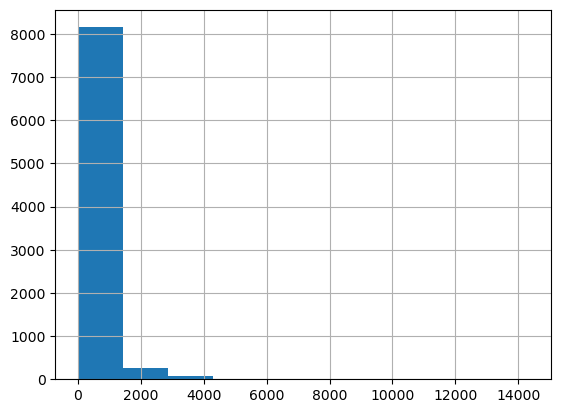

In [76]:
data['RoomService'].hist();

In [78]:
data['logRoomService'] = np.log(data['RoomService']+1)

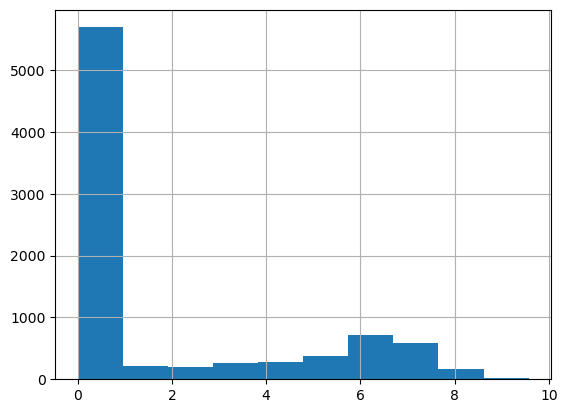

In [79]:
data['logRoomService'].hist();

In [82]:
data.nunique()

PassengerId       8693
HomePlanet           3
CryoSleep            2
Cabin             6560
Destination          3
Age                 80
VIP                  2
RoomService       1273
FoodCourt         1507
ShoppingMall      1115
Spa               1327
VRDeck            1306
Name              8473
Transported          2
logRoomService    1273
dtype: int64

In [19]:
cat_cols = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
numerical_cols = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
print(len(cat_cols)+len(numerical_cols)) 

13


In [28]:
y = data['Transported']
X = data.drop('Transported',axis=1)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [35]:
x_train.shape

(6085, 13)

<Axes: xlabel='HomePlanet', ylabel='Transported'>

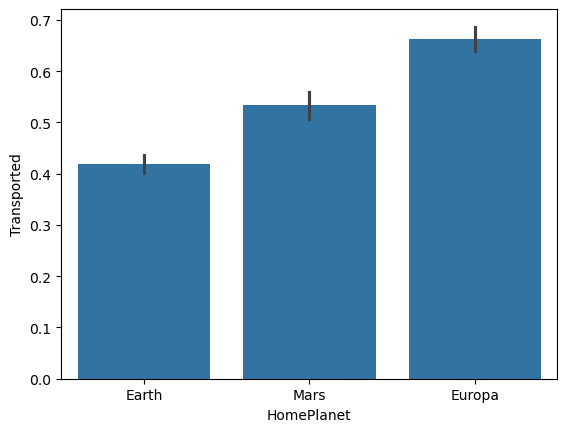

In [59]:
sns.barplot(x=x_train.HomePlanet,y=y_train)

In [72]:
def preprocessing(independent_df):
    if independent_df.isna().any().sum() !=0:
        modes = independent_df.mode().iloc[1]
        independent_df.fillna(modes,inplace=True)
    independent_df[]
    processed_df = independent_df
    return processed_df